<a href="https://colab.research.google.com/github/Aaaaangla/Personal-Website/blob/main/La_Roche_Posay_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## La Roche Posay EDA ##

首先这里我们会有五个主要的EDA步骤：
1. 基础统计与变量理解；
2. 始建于周期性分析；
3. 消费者行为模式分析；
4. 特征相关性分析；
5. 类别变量分析

I will conduct the EDA based on these five sections.

### **1. Basic statistics & variable understanding**

In this section, I need to ensure that the data are complete, clean, and correctly typed, while identifying initial business patterns.

#### Step 1: Load and inspect

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving QBUS_LOreal_Data_Regression.csv to QBUS_LOreal_Data_Regression.csv


In [ ]:
LRP = pd.read_csv("QBUS_LOreal_Data_Regression.csv")
LRP.head()

,Unnamed: 0,CustomerID,Has_Transaction_Nov23_May24,Total_Spent_Nov23_May24,Total_Spent_1M,Transaction_Count_1M,Total_Spent_3M,Transaction_Count_3M,Total_Spent_6M,Transaction_Count_6M,...,EAN_TolerianeMoisturiser40ml,EAN_HyaluB5Serum30ml,EAN_EffaclarMoisturiser40ml,EAN_VitaminC10Serum30ml,EAN_RetinolB3Serum30ml,EAN_EffaclarSerum30ml,EAN_AntheliosInvisibleSunscreen50ml,EAN_Pure10NiacinamideSerum,EAN_CicaplastB5BaumeBothSKUs40ml,Post Code
0,0,LRP00002,1,119.81,143.00,1,143.00,1,143.00,1,...,0,0,0,0,0,0,0,0,0,NaN
1,1,LRP00004,1,461.54,0.00,0,0.00,0,189.36,1,...,0,0,1,0,0,1,0,0,0,NaN
2,2,LRP00008,1,38.41,0.00,0,0.00,0,161.59,1,...,0,0,1,0,0,1,0,0,1,NaN
3,3,LRP00009,1,168.25,73.62,1,73.62,1,73.62,1,...,0,0,0,0,0,0,0,0,0,NaN
4,4,LRP00012,1,82.28,0.00,0,0.00,0,0.00,0,...,1,0,0,0,0,0,0,0,0,NaN


In [ ]:
LRP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 63 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                6400 non-null   int64  
 1   CustomerID                                6400 non-null   object 
 2   Has_Transaction_Nov23_May24               6400 non-null   int64  
 3   Total_Spent_Nov23_May24                   6400 non-null   float64
 4   Total_Spent_1M                            6400 non-null   float64
 5   Transaction_Count_1M                      6400 non-null   int64  
 6   Total_Spent_3M                            6400 non-null   float64
 7   Transaction_Count_3M                      6400 non-null   int64  
 8   Total_Spent_6M                            6400 non-null   float64
 9   Transaction_Count_6M                      6400 non-null   int64  
 10  Total_Spent_9M                      

**Key Takeaways**:
1. There are **63 columns**. Most of the columns have maximum **6400 rows**, except for '**Post Code**' column, it only has **1074 non-null rows**;
2. There are **8 columns** are **float64**; **54 columns** are **int64**; and just **1 column** is **object**;
3. The only column that is identified as **Object** is '**Customer ID**, which is the unique identifier to each customer. This data can be useless when training the predictive model, thus can be deleted in the later stage. However, before modelling, this customer ID can be used to calculate the rate of existing customers who re-purchase the LRP products within a year;
4. Most of the **Float** columns are from the '**Total Spent**' columns and **one** is from the '**Post Code**'. We can look into the Post Code column, but if the repeative of the Post Code is too high, it can be considered to delete this column.

### Step 2: Identify variable types

For this step, categorical variables and contiunuous variables can be identified.

In [ ]:
# 查看所有字段类型
LRP.dtypes.value_counts()

# 分别挑选出不同类型的变量
categorical_cols = LRP.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols   = LRP.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical variables:", len(categorical_cols))
print(categorical_cols)
print("\nNumerical variables:", len(numerical_cols))
print(numerical_cols)

Categorical variables: 1
['CustomerID']

Numerical variables: 62
['Unnamed: 0', 'Has_Transaction_Nov23_May24', 'Total_Spent_Nov23_May24', 'Total_Spent_1M', 'Transaction_Count_1M', 'Total_Spent_3M', 'Transaction_Count_3M', 'Total_Spent_6M', 'Transaction_Count_6M', 'Total_Spent_9M', 'Transaction_Count_9M', 'Total_Spent_12M', 'Transaction_Count_12M', 'Total_Spent_AllTime', 'Transaction_Count_AllTime', 'Brand Description_Anthelios', 'Brand Description_Bundle', 'Brand Description_Cicaplast', 'Brand Description_Eau Thermale', 'Brand Description_Effaclar', 'Brand Description_Hyalu B5', 'Brand Description_Lipikar', 'Brand Description_Niacinamide', 'Brand Description_Retinol LRP', 'Brand Description_Serozinc', 'Brand Description_Toleriane', 'Brand Description_Uvidea', 'Brand Description_Vitamin C', 'Class Description_Anti-Acne', 'Class Description_Anti-Ageing', 'Class Description_Body Care', 'Class Description_Bundle', 'Class Description_Face Care', 'Category_Body Care', 'Category_Face Care', '

**Key Takeaways**:
1. There are **62 Numerical Variables** and only **1 Categorical variables** (which may be not involved in modelling in later stage). It indicates that when I am doing the feature engineering, I should apply scaling techniques;  
2. Almost all of my data are numberical variables. It will impact how should I do my feature engineering (standardisation, encoding, etc.), what format or parameters for later modelling, and how to present the EDA visualisations;
3. In this case, I should appy scaling techniques when doing feature engineering, choose different parameters or types of variables to fill up or deal with the missing value; applying histogram when conducting EDA visualisation;
4. Most importantly, it indicates that my data is a **typical feature-engineered numeric-only** predictive dataset;
5. It means, my data may not be a raw transactional data, but a pre-dealed analytic base table;
6. Almost all the information are quantitated behaviour characteristics. My model can use these characteristics to predict the result without extra coding. These data are the best fit for two-stage machine learning framework applications;


 ###

### Step 3: Check missing values

**Interpretation**:
*   if < 5% -> ignore or simple imputation
*   if 5 - 30% -> impute using median/mode
*   if > 30% -> consider dropping or justifying










In [ ]:
missing = LRP.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(LRP) * 100).round(2)
missing_df = pd.concat([missing, missing_pct], axis=1, keys=['Missing', '%'])
print(missing_df)

                                     Missing      %
Post Code                               5326  83.22
CustomerID                                 0   0.00
Unnamed: 0                                 0   0.00
Total_Spent_Nov23_May24                    0   0.00
Total_Spent_1M                             0   0.00
...                                      ...    ...
EAN_VitaminC10Serum30ml                    0   0.00
EAN_EffaclarSerum30ml                      0   0.00
EAN_AntheliosInvisibleSunscreen50ml        0   0.00
EAN_Pure10NiacinamideSerum                 0   0.00
EAN_CicaplastB5BaumeBothSKUs40ml           0   0.00

[63 rows x 2 columns]


**Key Takeaways**:
1. Only Post Code has missing value and the missing rate has reached 83.22%;
2. It is greater than 30%, if I keep it, it will bring a lot of noise to my training model;
3. Drop it;

### Step 4: Detect outliers (numeric features)

To identify any outliers and consider whether they may be impact the feature model training.

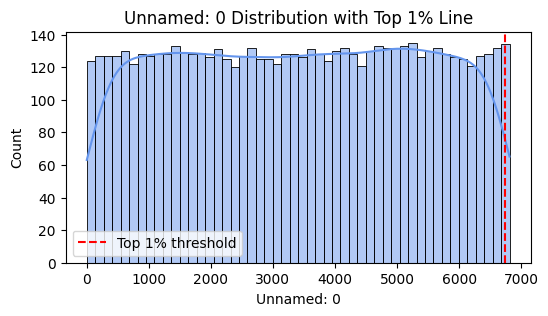

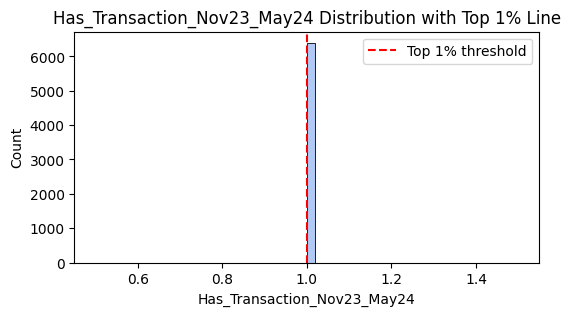

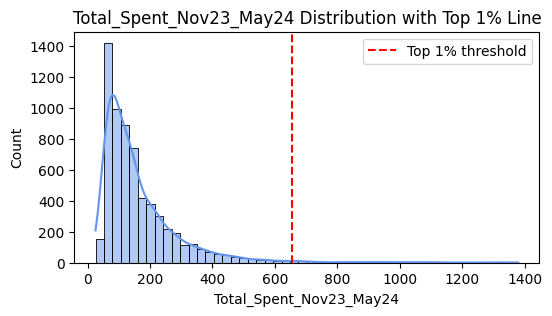

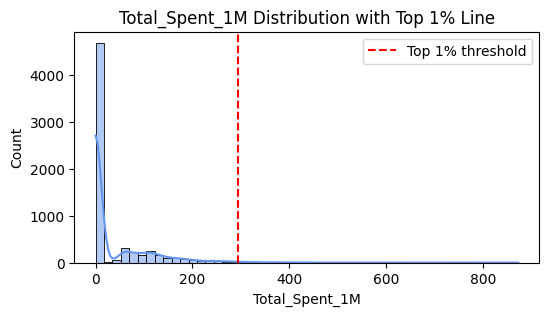

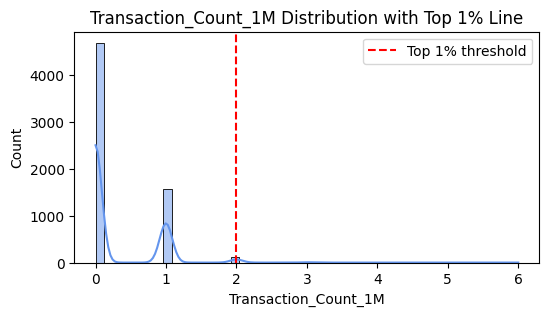

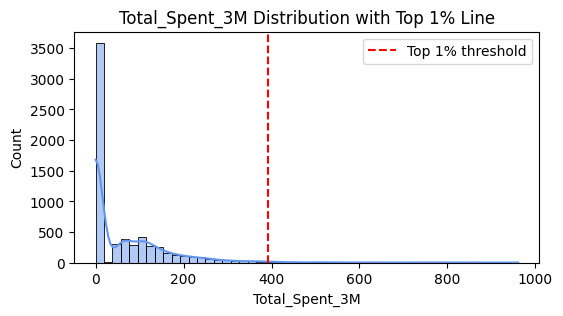

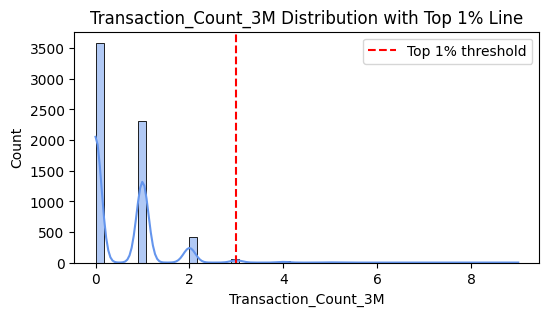

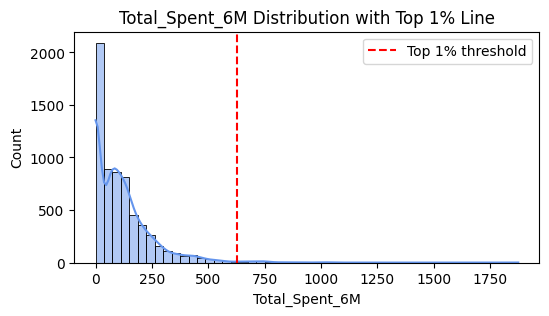

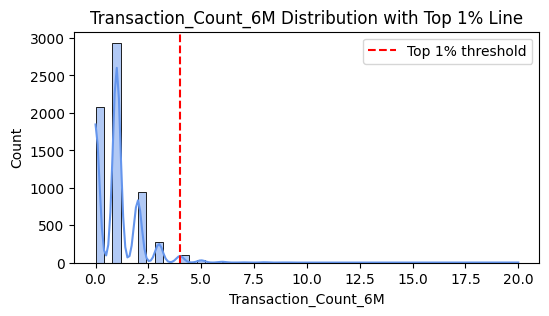

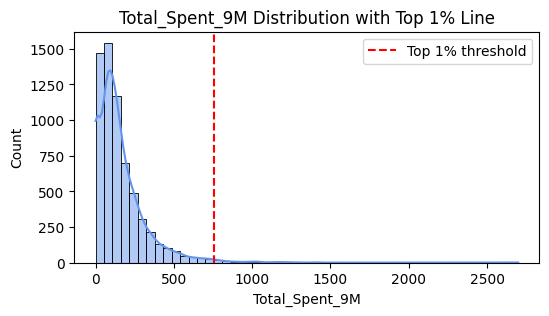

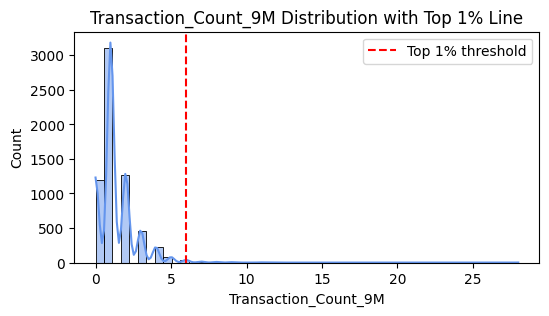

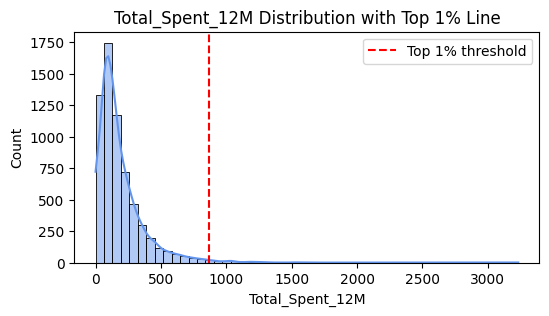

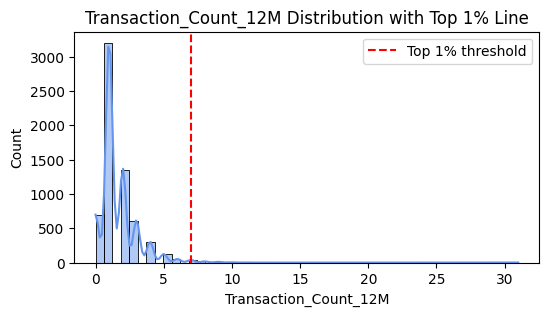

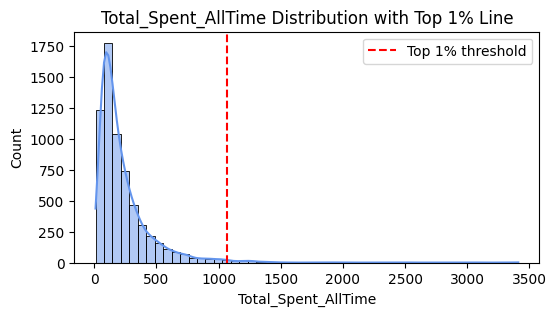

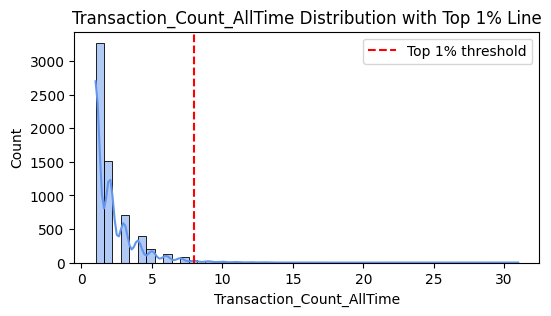

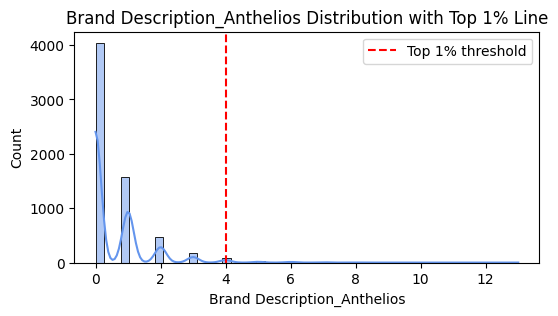

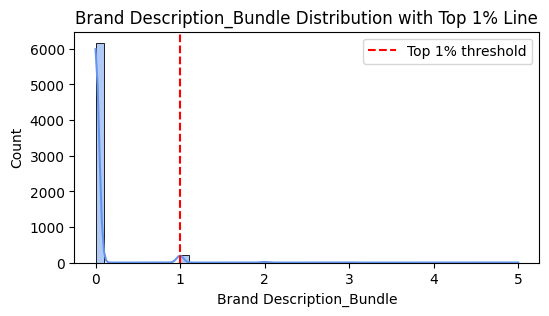

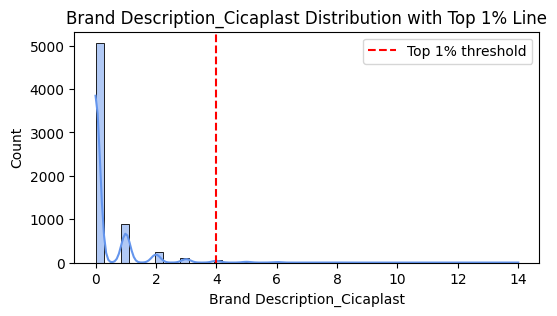

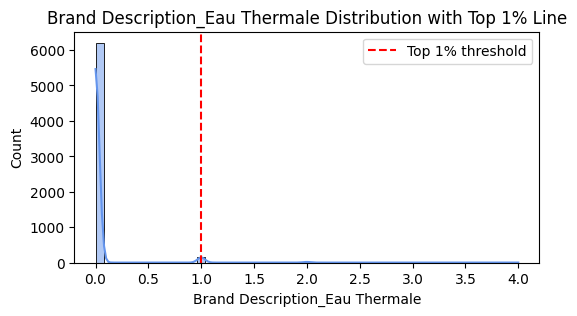

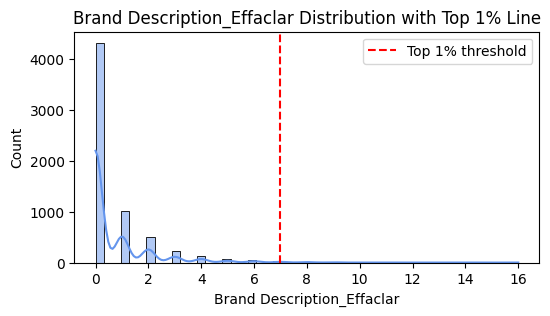

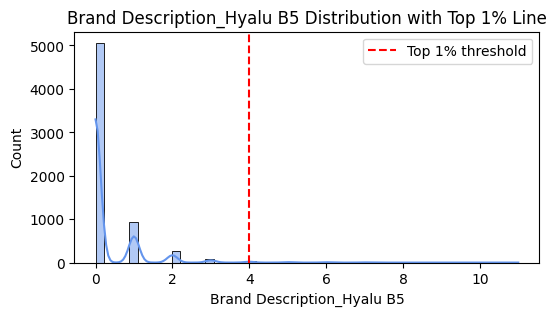

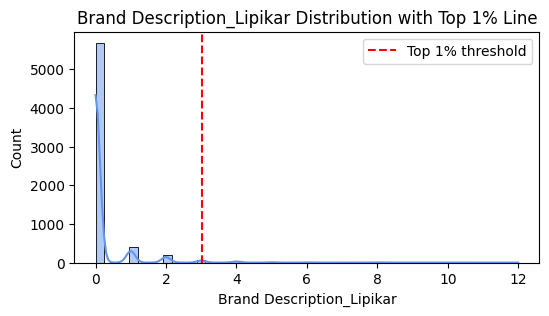

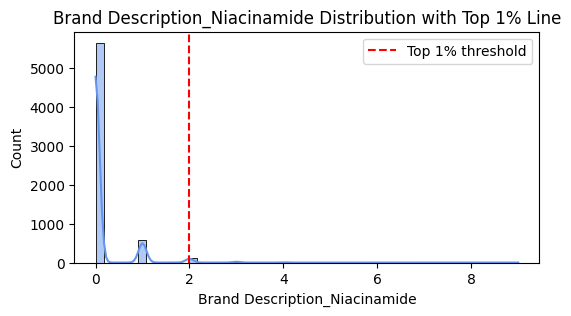

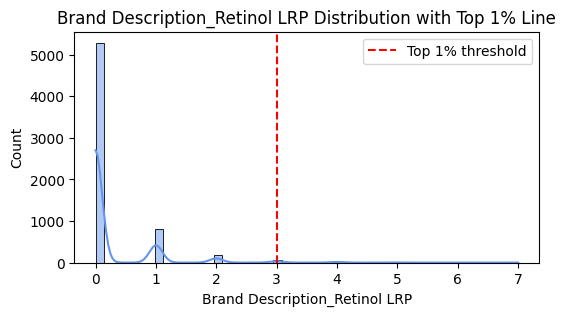

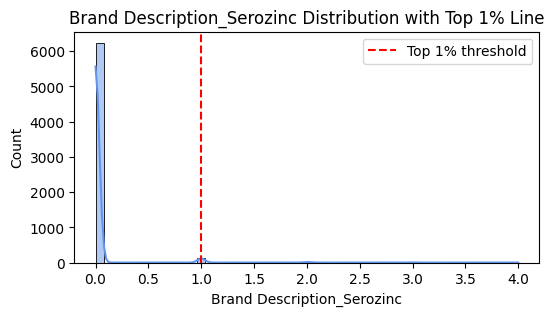

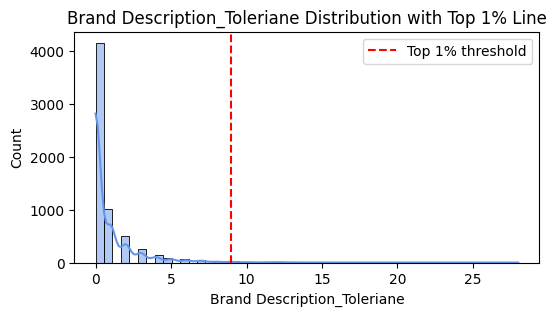

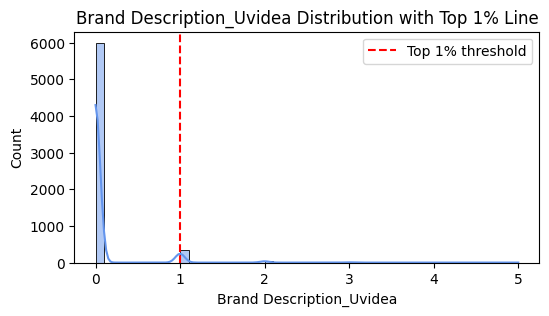

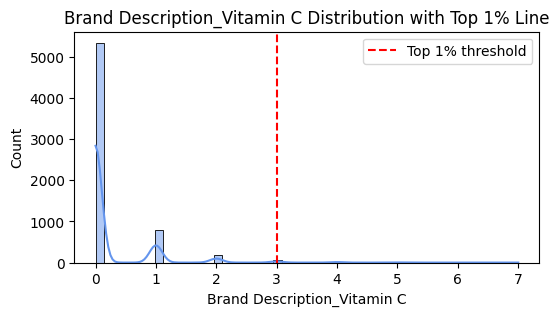

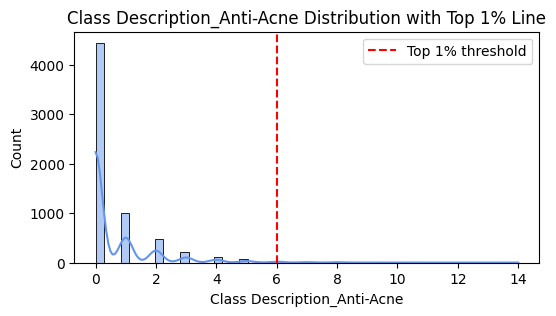

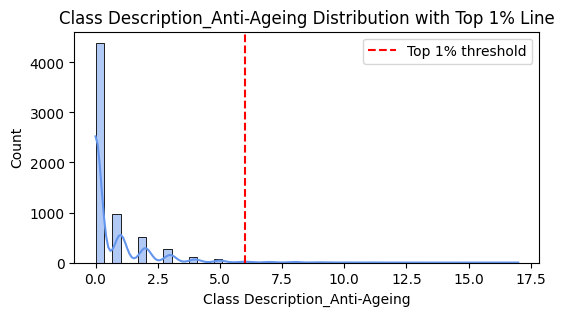

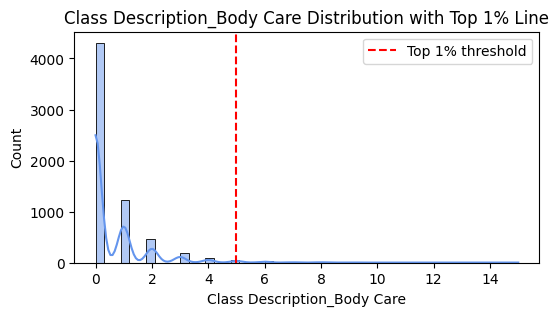

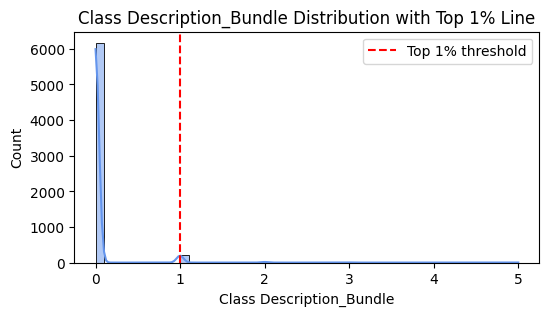

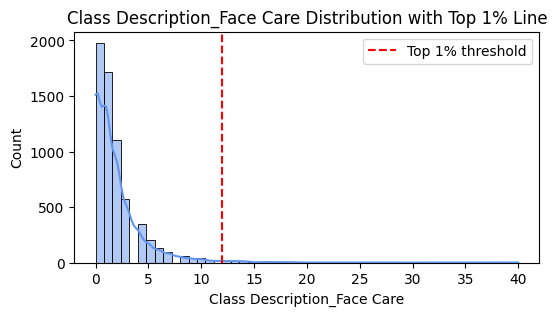

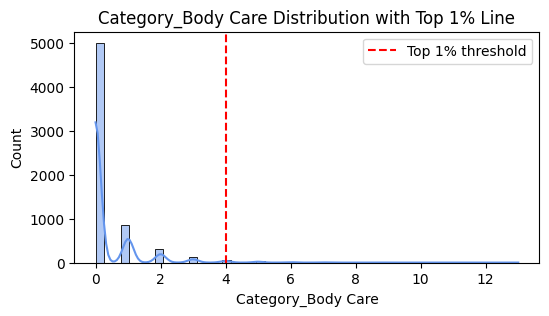

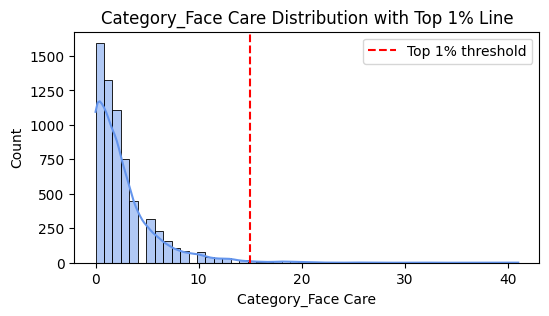

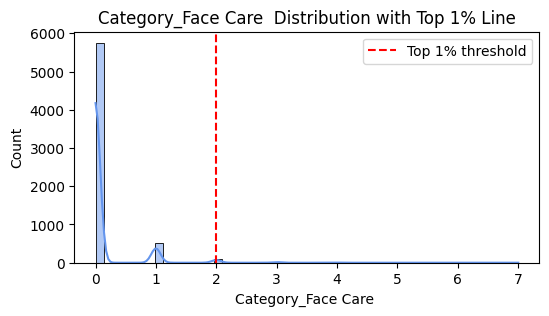

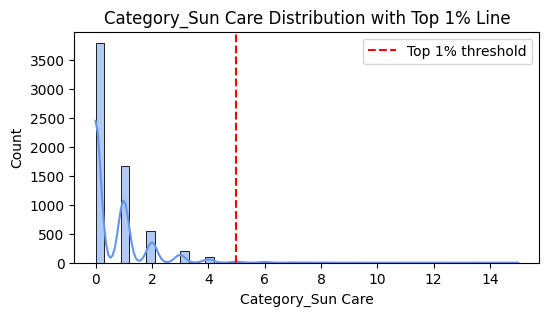

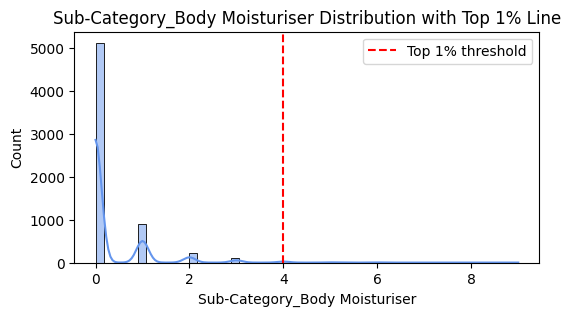

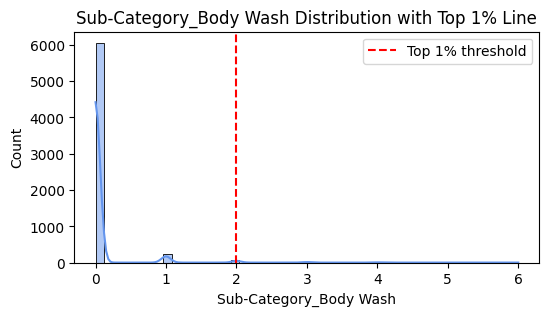

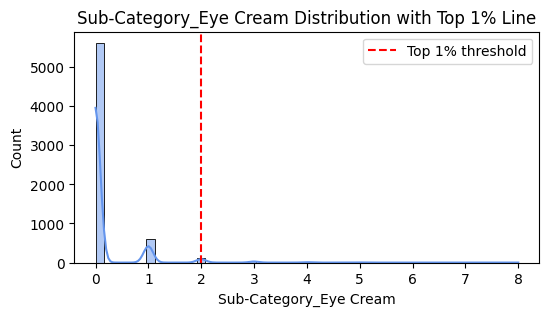

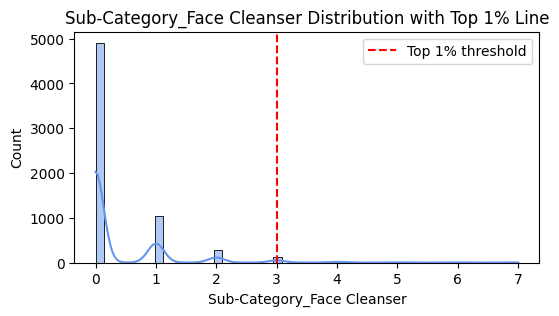

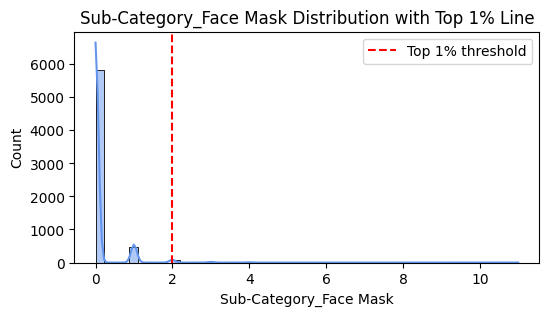

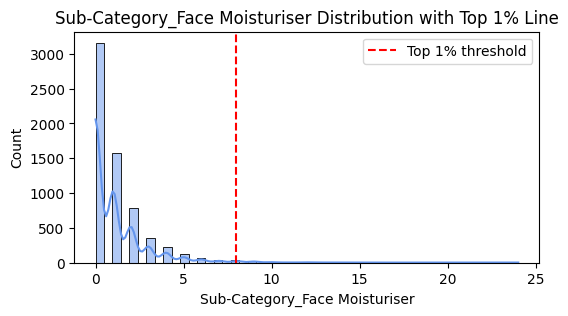

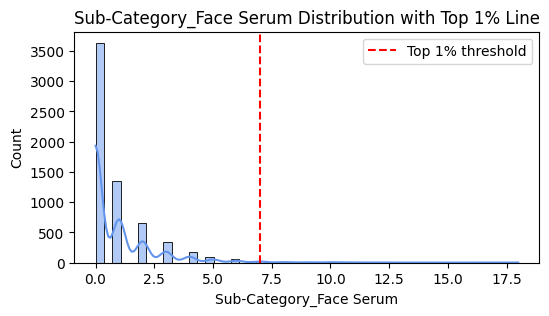

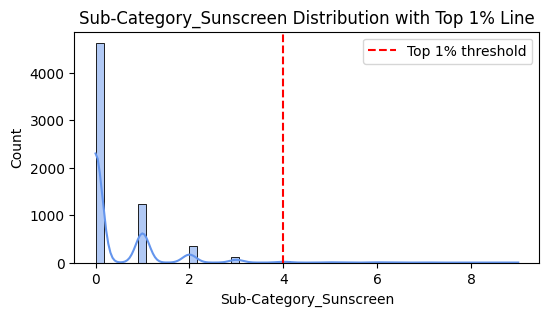

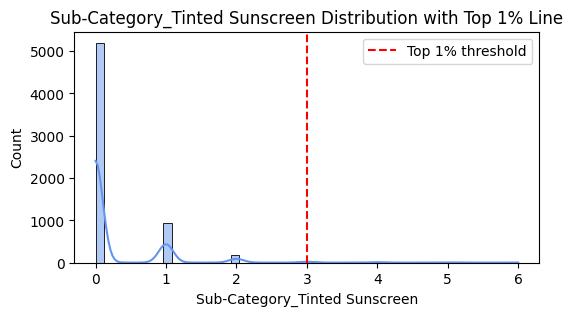

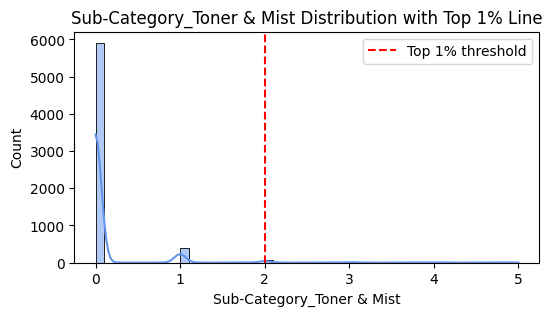

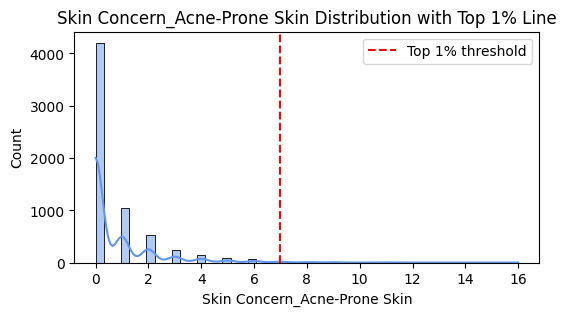

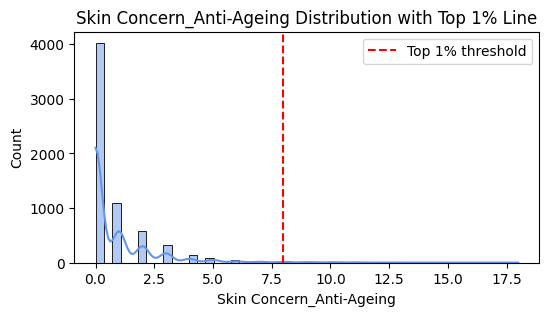

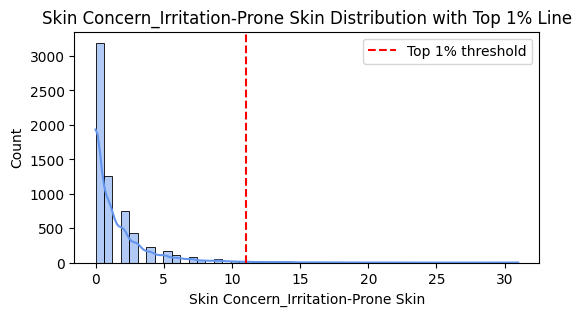

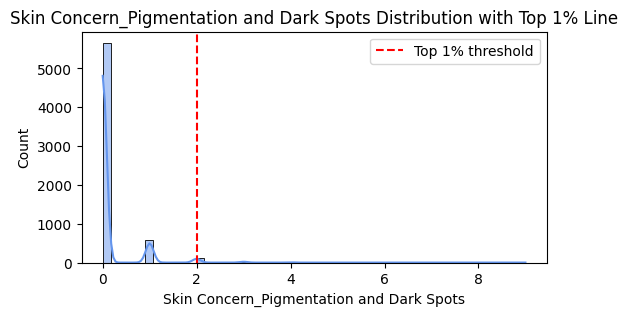

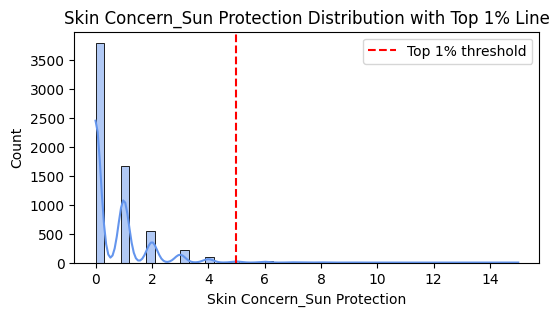

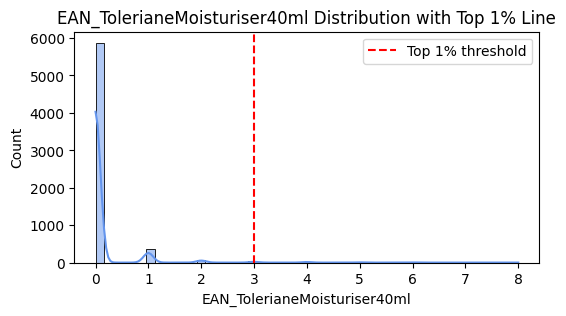

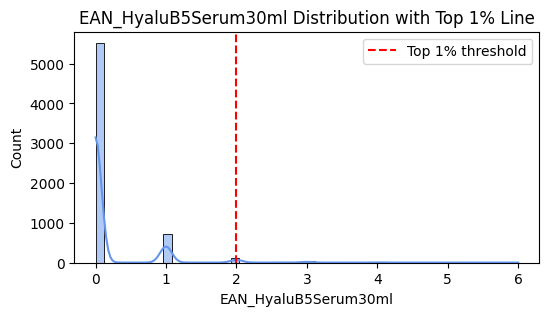

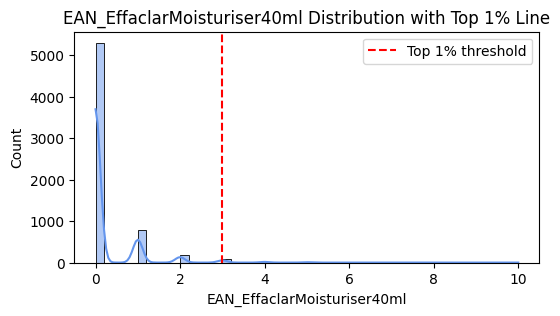

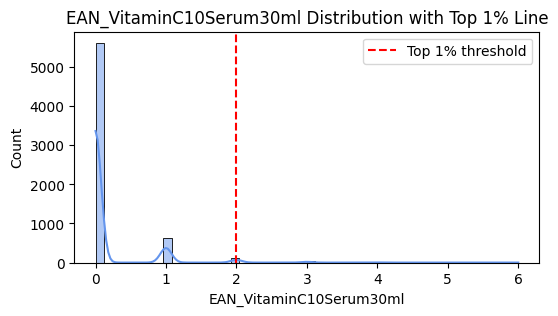

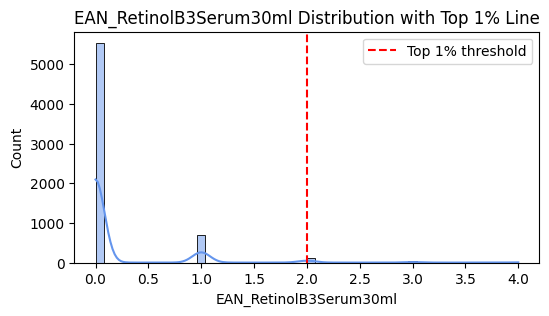

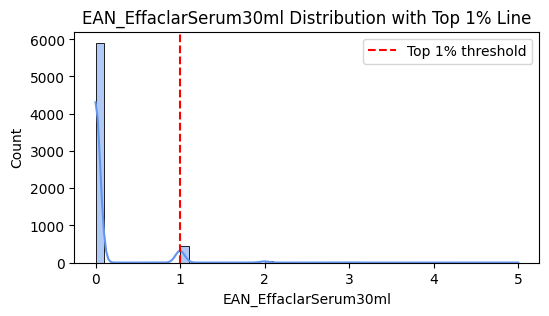

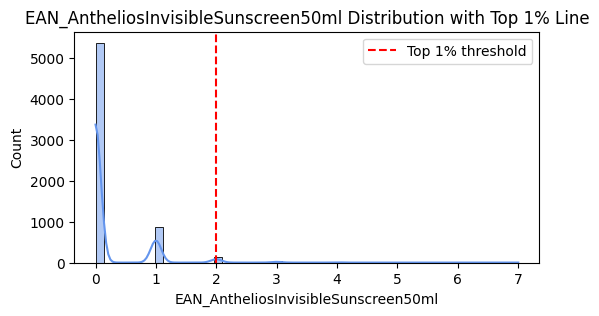

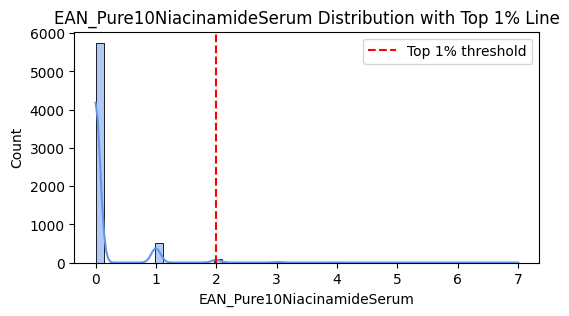

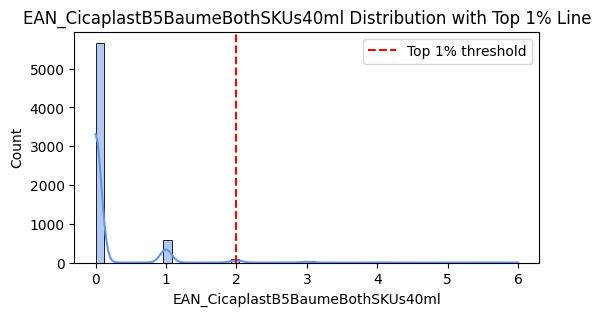

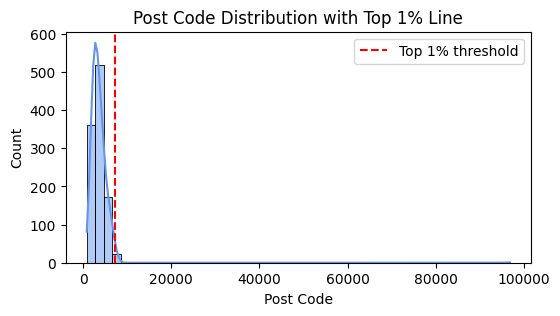

In [ ]:
for col in numerical_cols:
    top_1p = LRP[col].quantile(0.99)
    plt.figure(figsize=(6, 3))
    sns.histplot(LRP[col], bins=50, kde=True, color='cornflowerblue')
    plt.axvline(top_1p, color='red', linestyle='--', label='Top 1% threshold')
    plt.title(f'{col} Distribution with Top 1% Line')
    plt.legend()
    plt.show()


**Key Takeaways**:
1. These data or outliers should not be deleted or trimmed, cuz they are representing the true high-value customers to the business;
2. In the dermatological beauty industry, outliers represents:
    *   Heavy buyers
    *   Elder customers with much stronger purchasing power
    *   Purchase only once for huge amount (stock-like purchasing)
3. These data represents the true patterns but not noise;
4. These non-sym distribution can reflect the true heterogeneity market data;
5. Two-stage has higher tolerance towards outliers:
    *   Stage 1 - classification -> to predict purchase or not. Minimum impact from outliers.

    *   Stage 2 - Regression -> to predict the consumption amount. If use Random Forest, XGBoost or Lasso, Ridge regression, then they are not sensitive to the outliers.








### Summary statistics

To summarise all the information.

In [ ]:
summary = LRP[numerical_cols].describe().T
summary['skewness'] = LRP[numerical_cols].skew()
summary['kurtosis'] = LRP[numerical_cols].kurt()
pd.set_option('display.max_rows', None)
display(summary)

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Unnamed: 0,6400.0,3418.947500,1967.042550,0.00,1709.750,3432.500,5121.250,6813.00,-0.008289,-1.201965
Has_Transaction_Nov23_May24,6400.0,1.000000,0.000000,1.00,1.000,1.000,1.000,1.00,0.000000,0.000000
Total_Spent_Nov23_May24,6400.0,162.998742,127.477466,25.51,79.950,124.355,200.825,1379.58,2.867704,13.302603
Total_Spent_1M,6400.0,34.455266,69.569793,0.00,0.000,0.000,53.960,872.74,2.791204,12.300396
Transaction_Count_1M,6400.0,0.292812,0.518040,0.00,0.000,0.000,1.000,6.00,1.856229,5.264931
Total_Spent_3M,6400.0,62.449945,94.729159,0.00,0.000,0.000,107.850,960.93,2.355380,9.329963
Transaction_Count_3M,6400.0,0.541562,0.724943,0.00,0.000,0.000,1.000,9.00,1.914394,8.357433
Total_Spent_6M,6400.0,114.505731,135.895771,0.00,0.000,84.720,161.850,1875.75,2.675881,15.090280
Transaction_Count_6M,6400.0,1.002969,1.040134,0.00,0.000,1.000,1.000,20.00,2.735464,24.675625
Total_Spent_9M,6400.0,155.998252,166.667910,0.00,57.520,115.100,208.820,2698.77,3.181643,23.494338


**Key Takeaways**:
1. Many spending-related variables (e.g., Total_Spent_1M, Total_Spent_3M, Total_Spent_6M) show **strong positive skewness** (~ 2.3 - 3.6) and **high kurtosis** (~ 9 - 27). This indicates that most customers spend small amounts, but a small group of **high-value customers** exhibit much larger purchase volumes.
2. Such heavy-tailed distributions are typical in **real-world e-commerce and retail datasets**, representing customer heterogeneity rather than data errors;
3. The log-transformed distributions show better normality but were kept in original form for realism, as the goal is to model **predictive behaviour** rather than **symmetry**.
4. Transaction count variables have mean < 2 and high vairance, suggesting that the majority of customers purchase infrequently (0-1 times per period), with a minority making multiple transactions.
5. Within brand-level variables, Effaclar, cicaplast, and Toleriane show relatively high means, implying **frequent engagement** with functional or dermatologically safe skincare lines.
6. High kurtosis (>20) across brand and category variables shows **uneven customer distribution**, where only a small portion of customers repeatdly buy from specific product lines (loyal users).
7. This brand loyalty pattern supports **segmentation modelling** based on brand affinity and functional product interest (e.g., acne care, anti-ageing, hydration).
8. Skin concern variables such as Acne-Prone Skin (mean ≈ 0.78) and Irritation-Prone Skin (mean ≈ 1.42) show **clear concentration in sensitive-skin use cases**, confirming that this dataset specifically represents **dermatological beauty customers**, not general makeup users.
9. High skewness and kurtosis in these variables again suggest that only a subset of customers express multiple overlapping concerns — useful features for **cluster analysis** or **multilabel prediction**.
10. The maximum values for spending variables (Total_Spent_AllTime = 3410.43) are realistic given the product price range and long observation window, hence retained as valid.
11. No statistical evidence suggests erroneous entries or data collection issues. Instead, these outliers reflect **premium skincare purchasing behaviour** (e.g., high-end serums or bulk orders).


我的数据是已经经过feature engineering and encoding处理后的结果了，可以直接用于machine learning，尤其是regression/clustering。

## **2. Seasonal / Periodic Pattern Analysis**:

### Step 1: Re-organise the time-related variables

For my data, it is a cumulated data, not representing count of each period respectively.

| Column                | 含义           | 关系            |
| --------------------- | ------------ | ------------- |
| `Total_Spent_1M`      | 最近 1 个月累计消费  | ⊂ 3M, 6M, 12M |
| `Total_Spent_3M`      | 最近 3 个月累计消费  | ⊃ 1M          |
| `Total_Spent_6M`      | 最近 6 个月累计消费  | ⊃ 3M          |
| `Total_Spent_9M`      | 最近 9 个月累计消费  | ⊃ 6M          |
| `Total_Spent_12M`     | 最近 12 个月累计消费 | ⊃ 9M          |
| `Total_Spent_AllTime` | 自注册以来所有消费    | ⊃ 全部          |

These cumulative structure **hides periodic or seasonal effects**. Therefore, I need to trim them into a **derive period-based spending format**.



In [ ]:
LRP['Total_Spent_Oct23'] = LRP['Total_Spent_1M']
LRP['Total_Spent_Sept23-Aug23'] = LRP['Total_Spent_3M'] - LRP['Total_Spent_1M']
LRP['Total_Spent_Jul23-May23'] = LRP['Total_Spent_6M'] - LRP['Total_Spent_3M']
LRP['Total_Spent_Apr23-Feb23'] = LRP['Total_Spent_9M'] - LRP['Total_Spent_6M']
LRP['Total_Spent_Jan23-Nov22'] = LRP['Total_Spent_12M'] - LRP['Total_Spent_9M']

LRP['Transaction_Count_Oct23'] = LRP['Transaction_Count_1M']
LRP['Transaction_Count_Sept-Aug23'] = LRP['Transaction_Count_3M'] - LRP['Transaction_Count_1M']
LRP['Transaction_Count_Jul23-May23'] = LRP['Transaction_Count_6M'] - LRP['Transaction_Count_3M']
LRP['Transaction_Count_Apr23-Feb23'] = LRP['Transaction_Count_9M'] - LRP['Transaction_Count_6M']
LRP['Transaction_Count_Jan23-Nov22'] = LRP['Transaction_Count_12M'] - LRP['Transaction_Count_9M']

先把这个表整理好，看着也太乱了。因为他的data全部都是cumulated的，所以我打算直接给他弄成体现他当月的数据的形式。

In [ ]:
# ---- TOTAL SPENT TABLE ----
spent_cols = [
    'CustomerID',
    'Total_Spent_Oct23',
    'Total_Spent_Sept23-Aug23',
    'Total_Spent_Jul23-May23',
    'Total_Spent_Apr23-Feb23',
    'Total_Spent_Jan23-Nov22'
]

LRP_spent = LRP[spent_cols].copy()
display(LRP_spent.head())


# ---- TRANSACTION COUNT TABLE ----
txn_cols = [
    'CustomerID',
    'Transaction_Count_Oct23',
    'Transaction_Count_Sept-Aug23',
    'Transaction_Count_Jul23-May23',
    'Transaction_Count_Apr23-Feb23',
    'Transaction_Count_Jan23-Nov22'
]

LRP_txn = LRP[txn_cols].copy()
display(LRP_txn.head())


,CustomerID,Total_Spent_Oct23,Total_Spent_Sept23-Aug23,Total_Spent_Jul23-May23,Total_Spent_Apr23-Feb23,Total_Spent_Jan23-Nov22
0,LRP00002,143.00,0.0,0.00,0.0,0.0
1,LRP00004,0.00,0.0,189.36,0.0,0.0
2,LRP00008,0.00,0.0,161.59,0.0,0.0
3,LRP00009,73.62,0.0,0.00,0.0,0.0
4,LRP00012,0.00,0.0,0.00,0.0,0.0


,CustomerID,Transaction_Count_Oct23,Transaction_Count_Sept-Aug23,Transaction_Count_Jul23-May23,Transaction_Count_Apr23-Feb23,Transaction_Count_Jan23-Nov22
0,LRP00002,1,0,0,0,0
1,LRP00004,0,0,1,0,0
2,LRP00008,0,0,1,0,0
3,LRP00009,1,0,0,0,0
4,LRP00012,0,0,0,0,0


我把它分成了两个部分。一个是专门存储spend的数据，一个专门存储transaction count的数据。

In [ ]:
numeric_spent_cols = [
    'Total_Spent_Oct23',
    'Total_Spent_Sept23-Aug23',
    'Total_Spent_Jul23-May23',
    'Total_Spent_Apr23-Feb23',
    'Total_Spent_Jan23-Nov22'
]

summary_spent = LRP_spent[numeric_spent_cols].describe().T
summary_spent['skewness']  = LRP_spent[numeric_spent_cols].skew()
summary_spent['kurtosis']  = LRP_spent[numeric_spent_cols].kurt()

display(summary_spent.round(2))


# ---- SUMMARY FOR TRANSACTION COUNT ----
numeric_txn_cols = [
    'Transaction_Count_Oct23',
    'Transaction_Count_Sept-Aug23',
    'Transaction_Count_Jul23-May23',
    'Transaction_Count_Apr23-Feb23',
    'Transaction_Count_Jan23-Nov22'
]

summary_transaction = LRP_txn[numeric_txn_cols].describe().T
summary_transaction['skewness']  = LRP_txn[numeric_txn_cols].skew()
summary_transaction['kurtosis']  = LRP_txn[numeric_txn_cols].kurt()

display(summary_transaction.round(2))

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Total_Spent_Oct23,6400.0,34.46,69.57,0.0,0.0,0.0,53.96,872.74,2.79,12.30
Total_Spent_Sept23-Aug23,6400.0,27.99,64.53,0.0,0.0,0.0,0.00,960.93,3.50,21.45
Total_Spent_Jul23-May23,6400.0,52.06,89.55,0.0,0.0,0.0,87.08,1142.42,3.08,17.94
Total_Spent_Apr23-Feb23,6400.0,41.49,79.40,0.0,0.0,0.0,64.72,1210.58,3.01,16.64
Total_Spent_Jan23-Nov22,6400.0,29.01,67.81,0.0,0.0,0.0,0.00,759.20,3.28,15.11


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Transaction_Count_Oct23,6400.0,0.29,0.52,0.0,0.0,0.0,1.0,6.0,1.86,5.26
Transaction_Count_Sept-Aug23,6400.0,0.25,0.51,0.0,0.0,0.0,0.0,7.0,2.49,10.82
Transaction_Count_Jul23-May23,6400.0,0.46,0.70,0.0,0.0,0.0,1.0,11.0,2.37,14.47
Transaction_Count_Apr23-Feb23,6400.0,0.37,0.63,0.0,0.0,0.0,1.0,8.0,2.09,7.87
Transaction_Count_Jan23-Nov22,6400.0,0.26,0.56,0.0,0.0,0.0,0.0,7.0,2.74,12.19


很有意思的是sep23-aug23这两个月里面的每人平均的购买金额都没有oct23一个月的高，一定是有什么政策刺激。还有一点就是，这个数据其实不好比对，它第一个是一个月的，第二个是两个月的，之后就是三个月的，我怎么比啊。

我觉得最好是把period统筹好，让他们都是三个月的数据才更有比较性。

下面再弄两个graph看看mean整体怎么样。

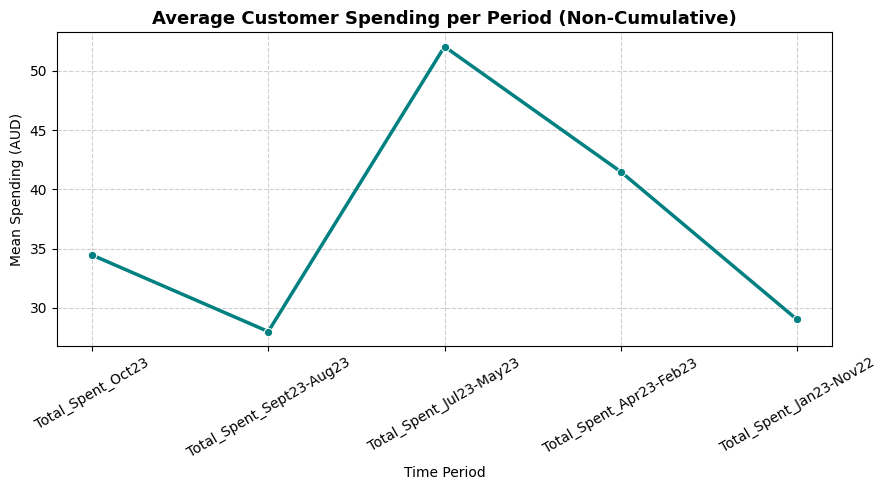

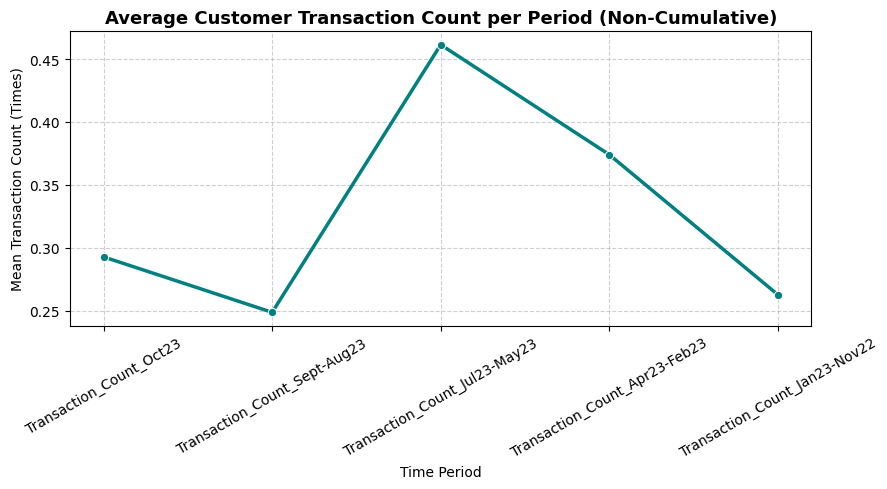

In [ ]:
# Calculate the average spending per period
means_spent = LRP[numeric_spent_cols].mean()

# Plot style
plt.figure(figsize=(9,5))
sns.lineplot(x=numeric_spent_cols, y=means_spent, marker='o', color='teal', linewidth=2.5)

plt.title('Average Customer Spending per Period (Non-Cumulative)', fontsize=13, weight='bold')
plt.ylabel('Mean Spending (AUD)')
plt.xlabel('Time Period')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Calculate the average spending per period
means_spent = LRP[numeric_txn_cols].mean()

# Plot style
plt.figure(figsize=(9,5))
sns.lineplot(x=numeric_txn_cols, y=means_spent, marker='o', color='teal', linewidth=2.5)

plt.title('Average Customer Transaction Count per Period (Non-Cumulative)', fontsize=13, weight='bold')
plt.ylabel('Mean Transaction Count (Times)')
plt.xlabel('Time Period')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

这个Jul23-May23到Sept23-Aug23掉的也太多了吧。Jul23-May23有三个月的数据，而Sept23-Aug23只有两个月的数据，如果加上Oct23的数据，那就是27.995 + 34.455 = 62.45.这还挺多的。应该写这个。

这个mean是看整体客户的行为，大部分普通客户的行为，不包括那些买的很多或者很少的客户。做一个累计起来的，都是三个月的图表。

In [ ]:
LRP['Total_Spent_Oct23-Aug23'] = LRP['Total_Spent_3M']
LRP['Transaction_Count_Oct23-Aug23'] = LRP['Transaction_Count_3M']

这个就是三个月三个月的图表了。这个就有比较的价值了。还是像上面一个一个试spend表格，一个试transaction count表格。

In [ ]:
# --- TOTAL SPENT columns ---
spent_cols_1 = [
    'Total_Spent_Oct23-Aug23',
    'Total_Spent_Jul23-May23',
    'Total_Spent_Apr23-Feb23',
    'Total_Spent_Jan23-Nov22'
]

# --- TRANSACTION COUNT columns ---
txn_cols_1 = [
    'Transaction_Count_Oct23-Aug23',
    'Transaction_Count_Jul23-May23',
    'Transaction_Count_Apr23-Feb23',
    'Transaction_Count_Jan23-Nov22'
]


# ---- SUMMARY FOR TOTAL SPENDING ----
summary_spent_1 = LRP[spent_cols_1].describe().T
summary_spent_1['skewness'] = LRP[spent_cols_1].skew()
summary_spent_1['kurtosis'] = LRP[spent_cols_1].kurt()

display(summary_spent_1.round(2))


# ---- SUMMARY FOR TRANSACTION COUNT ----
summary_txn_1 = LRP[txn_cols_1].describe().T
summary_txn_1['skewness'] = LRP[txn_cols_1].skew()
summary_txn_1['kurtosis'] = LRP[txn_cols_1].kurt()

display(summary_txn_1.round(2))

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Total_Spent_Oct23-Aug23,6400.0,62.45,94.73,0.0,0.0,0.0,107.85,960.93,2.36,9.33
Total_Spent_Jul23-May23,6400.0,52.06,89.55,0.0,0.0,0.0,87.08,1142.42,3.08,17.94
Total_Spent_Apr23-Feb23,6400.0,41.49,79.40,0.0,0.0,0.0,64.72,1210.58,3.01,16.64
Total_Spent_Jan23-Nov22,6400.0,29.01,67.81,0.0,0.0,0.0,0.00,759.20,3.28,15.11


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Transaction_Count_Oct23-Aug23,6400.0,0.54,0.72,0.0,0.0,0.0,1.0,9.0,1.91,8.36
Transaction_Count_Jul23-May23,6400.0,0.46,0.70,0.0,0.0,0.0,1.0,11.0,2.37,14.47
Transaction_Count_Apr23-Feb23,6400.0,0.37,0.63,0.0,0.0,0.0,1.0,8.0,2.09,7.87
Transaction_Count_Jan23-Nov22,6400.0,0.26,0.56,0.0,0.0,0.0,0.0,7.0,2.74,12.19


这个就好了。但是我发现了几个很有意思的点：（只是针对spend table的）

*   这里就很明显可以看出来了，23年2月到4月之间公司应该是有什么政策或者是Boost让消费者提升了对品牌的购买兴趣.而在之前的data summary table看得出来，23年10月又有一波政策的改变和刺激，而且这个改变和激励算是陈工的。这让目前的平均消费金额每三个月都在增长 ->而且是线性增长
*   但是它这个mean在呈线性增长，但是std越来越大了。这意味着顾客总体消费水平提高的同时，消费差异也在扩大。换言之，虽然平均消费额在上升，但是这一增长主要是由少数高消费顾客推动，而大部分顾客的消费仍处于较低水平，表明，客户群体内部的消费行为呈现出更强的异质性。
* 接下来就是75%，它和mean还有std的规律也是一样的。这说明，在Aug23-Oct23的时间里面，有75%的消费者消费小于$107.85,而在May23-Jul23的时间里，同一批消费者有75%消费小于$87.05,以此类推。这能看出，消费者整体消费水平上移。而在Nov22-Jan23的时间里面，顾客活跃度是最低的，购买行为集中在少数客户身上。现在是更多人参与且单次消费金额提升，对应mean体现的结果。
* 然后就是max，按照目前的数据来说，Feb23-Apr23的时候一定是政策的激励的，一下子一位消费者的3个月的累计消费就到了$210.58,之后就是在慢慢的冷静下来了。还有一个点就是mean，std上升，但是max反而更低了。说明现在中间等级的消费者在发力了，他们在靠近高消费者，但是地消费者可能还没有被调动起来。
  * 中等消费群体正在活跃上升；高消费群体的增长势头趋缓；低消费者仍未被有效激活。
  * 消费动力从少数高价值客户转移到中层客户。表明品牌成功地扩大了主流客户群的参与度，中间消费客户对品牌信任度增强，愿意投入更多预算。而对高消费客户，他们已经积累了足够的库存或已完成了品牌探索阶段，进入了品牌忠诚，但理性复购阶段，不再显著提高平均消费。
* 之后就是skewness，还有kurtosis。skewness慢慢的又在变小。要是skewness小于0，说明data偏右，多低消费，少高消费。很明显，一开始的时候试多低消，少高消。但是在May23-Jul23的时候又上涨了一些，应该是政策同时刺激了高消费者，到aug23-oct23，部分低消转成了中至高消。
* kurtosis大于3，说明极端高消费客户出现频率高。这个data说明了之前Nov22-Jan23高消提升了平均消费，feb23-apr23新政策的出台刺激中消费，may23-jul23刺激过头了，也刺激到了高消费。aug23-oct23，高消费逐渐冷静下来，中消费客户比例逐步增加。



以下是关于transaction count table的分析：
* Mean每三个月都在增加，说明购买人数 & 购买频次都在提升。大部分消费者的交易次数是0，说明LRP的用户群高度分散，大部分人是偶尔买/或只在皮肤科推荐时买。mean上升说明被成功激活的消费者越来越多，品牌的基础活跃用户正在变大，消费者对LRP的依赖度正在提升。
* std的提升表示，更多人开始购买，少数heavy user的购买频率也在提高。重点是，消费者的行为再分化，一部分消费者更依赖LRP，另一部分的消费者仍然完全没有被激活。
* 还有一点是，大额购买者不一定是高频购买者。高价值客户是一次性大额购买+囤货，高频用户不一定消费金额高。这说明消费者分层如下：
  * Segment A: High-value Low-frequency大额囤货:
    * purchase 1-2 times
    * Highly spent every time
    * Usualy 是皮肤科推荐一整套疗程的客户
    * spend Max高，但是count max不高
  * Segment B: Mid-Value High Frequency (日常补货)：
    * 购买次数多
    * 单笔金额小
    * 表现为skincare rountine 用户
  * Section C: Low-Value Low-Frequency 未激活：
    * 多数消费者
    * 完全未被品牌fully capture的
* Spending Kurtosis长尾很强，说明高消费非常集中在一小群heavy user那边，大多数客户金额极低，金额的常委稳定存在，而最后一个period下降到9，说明品牌的消费结构开始变得更均衡，更多mid-tier customer贡献金额，营销活动让消费金额趋于中间值。
* 而Transaction Kurtosis的跳跃更明显。从12突然下降到7，说明原本高频客户的比例下降，或新加入的中低频客户大量增加，导致分布构架平滑。7突然上升到14，说明某个period有人分矿在repurchase。而14突然再次下降到8，说明高频客户的狂热期结束，购买行为回归正常，新的活跃中等消费者稳定下来

### **⭐ La Roche-Posay 消费者行为洞察（重点 Dot Points）**

#### **🔵 1. 消费金额（Value Dimension）**
**Activation Events**:

2023 Feb–Apr 与 2023 Aug–Oct 出现两次明显消费提升 → 强 campaign / 政策刺激成功。

**Mean**:

平均消费呈线性上升 → 消费者预算提升、信任增强、品牌价值被更广泛接受。

**Std**:

Std 随 mean 增加 → 行为差异扩大；高消费 vs 低消费的差距变大（异质性增加）。增长更多来自少数高消费用户（Value polarization）。

**75% Percentile**:

75% 分位数持续上升 → 中等消费群体（mid-tier）明显被激活，消费深度增加。

**Max（极端高消费）**:

Feb–Apr 的 Max 最高 → 高消费族群爆发式购买（囤货 / 医师疗程）。后期 Max 下降 → 高消费客户回归理性；中层客户开始支撑增长。

**Consumer Tier Shifts**:

* Mid-tier 加速成长 → 成为品牌主力。
* High-tier 稳定 → “囤货完成期”下降至正常水平。
* Low-tier 仍未完全激活 → 保留未来增长空间。
* 品牌结构从 “金字塔型” → “橄榄型” 转变（中层扩大）。

**Skewness / Kurtosis**:

Skewness 下降 → 消费分布更均衡，中层用户增加。Kurtosis 下降 → 极端高消费用户影响弱化，品牌进入成熟阶段。

#### **🟣 2. 交易频次（Frequency Dimension）**

**Mean（频次提高）**:

每三个月都上升 → 活跃用户增加，消费者对品牌依赖度增强。

**Std（行为分化）**:

高频与零购买并存 → 行为分化明显（habitual vs occasional）。

**Value vs Frequency Separation**:

* 高消费者 ≠ 高频消费者。
  * High-value：一次买很多 → 医师推荐/囤货型
  * High-frequency：多次购买但单笔不高 → 日常补货型

**Kurtosis（峰度跳动）**:

* 12 → 7：大量新低频用户加入 → 行为更平滑。
* 7 → 14：某一周期发生大量 repurchase（疗程/补货）。
* 14 → 8：routine 用户稳定，高频客户冷静。

#### **🔵 3. 综合洞察（Value × Frequency）**
* 增长动力由 Heavy Users → Mid-tier 转移（更健康、可持续）。
* 中消费客户在金额和频次上均提升，逐渐成为核心增长引擎。
* 高价值用户趋于稳定，不再主导总体增长。
* Low-tier 用户仍未全面激活，未来仍有巨大成长潜力。
* 品牌消费者结构更均衡，行为更成熟，整体 engagement 上升。

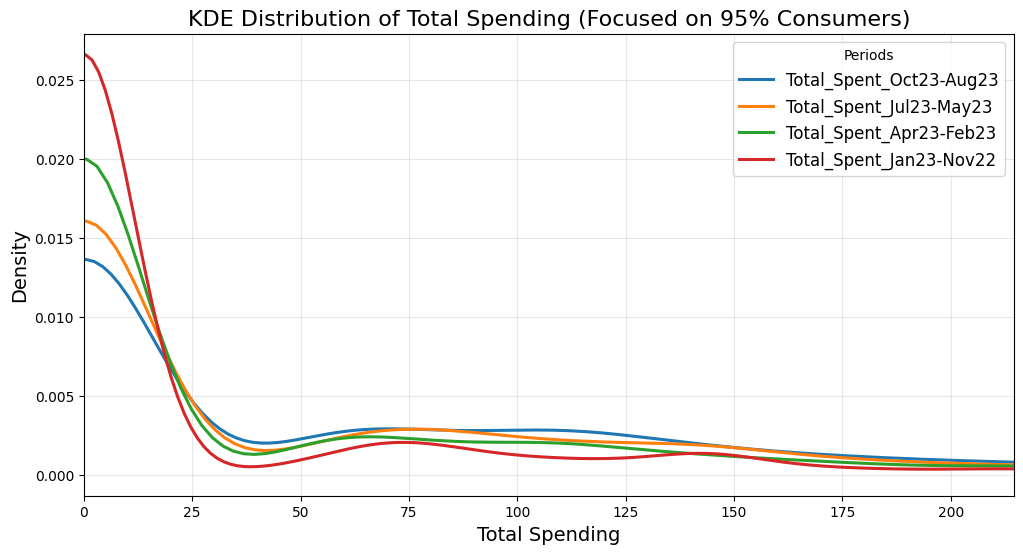

In [ ]:
plt.figure(figsize=(12, 6))

# Compute 95th percentile of all spending
x_cap = np.percentile(LRP[spent_cols_1].values, 95)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for col, color in zip(spent_cols_1, colors):
    LRP[col].plot(kind='kde', linewidth=2.2, label=col, color=color)

plt.title("KDE Distribution of Total Spending (Focused on 95% Consumers)", fontsize=16)
plt.xlabel("Total Spending", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Periods", fontsize=12)
plt.grid(alpha=0.3)

# Limit x axis to 95% of the data to remove long tail
plt.xlim(0, x_cap)

plt.show()

这个会比较好一点，把tail去掉了一些，主要看majority的sitribution变化。

### ⭐ **每个时间段内“消费金额分布”的形状变化**

= 不同消费群体的比例变化
= 消费行为的结构性变化
= 哪些客户在推动增长
---

### 🔥 **1. 低消费用户仍然占绝大多数（所有曲线在 $0–$20 处最高）**

你看到所有曲线在 **0–10 区间密度最高**：

→ 说明 **大多数用户消费金额很低**
（包括只买一次、买小件、试用型、Derm 推荐但买单支产品）

这与 median = 0 完全一致。

这告诉你：

* LRP 的用户金字塔底层非常大
* 低消费用户仍然是品牌的主要客户基数
* 这些人未被有效激活，有 huge upside potential

**越是尖锐的左边峰值，越说明 low-tier 占比高。**

---

### 🔥 **2. 曲线逐期“右移 + 拉平” → 代表 mid-tier 消费者比例在增加**

你注意到曲线的变化：

* Nov22–Jan23（红色） → 最靠左，说明消费普遍低
* Apr23–Feb23（绿色） → 稍微右移
* Jul23–May23（橙色） → 再往右
* Oct23–Aug23（蓝色） → 最右

右移说明：

### ✔ 消费金额整体上升
### ✔ 更多消费者开始变成 mid-tier
### ✔ routine 用户与 skincare-budget 用户增加

而且随着右移，曲线变得更“宽、更平”：

→ 说明消费金额分布拉开，不再高度集中在低消费区
→ mid-tier 的占比在变高
→ low-tier → mid-tier 的迁移发生了

---

### 🔥 **3. 右尾（高消费区域）几乎没有明显尖峰 → 高消费用户比例非常低**

你观察右尾（$80–$200 区间）：

* 曲线都很低
* 没有明显“凸起”
* 各期差异不大

这说明：

### ✔ 高消费用户非常少，不足以形成明显的 density
### ✔ 高消费群体不是品牌增长主力
### ✔ 思路应该放在 mid-tier activation，而不是 heavy-tier expansion

这与 summary table 的 kurtosis、skewness 完全吻合。

---

### 🔥 **4. 不同月份的曲线高度差 ≠ 不同客户数量差**

你问的重点来了：

> 是否能说明不同消费等级客户的“比例”？

**能说明比例趋势（relative proportion），但不能说明具体人数。**

例如：

### ✔ 左边峰值越高 → 低消费用户占比越大

（Nov22–Jan23 的红色最高 → 低消费最多）

### ✔ 中间区域（$50-$100）曲线越高 → mid-tier 占比越大

（最新蓝色线在中段最高 → mid-tier 增长明显）

### ✔ 右尾线越“厚” → heavy users 的行为活跃

（蓝色线在右尾比红色高 → heavy 预算有轻微提升，但仍然很少）

因此 KDE 显示的是：

### ✔ 不同消费层级的“密度变化趋势”
### ❌ 但不能告诉你具体有哪些人属于哪一层级

---

### 🔥 **5. 蓝色曲线整体最右 + 中段最高 → 当前增长主力是中层消费者**

蓝色（Oct23–Aug23）特点：

* 左侧峰值比红色低 → 低消费比例下降
* 中段（$50–$120）密度最高 → mid-tier 明显增加
* 右尾稍微高于其他线 → 偶尔出现大额消费用户

这正说明：

# ⭐ 品牌正在从 “低消费用户为主” → “中等消费主导的成熟结构” 转型

非常健康。

---

### 🔥 **6. 为什么 Apr23–Feb23（绿色）在中段突然高？→ 那次激励政策非常有效**

你注意到绿色曲线：

* 在 $40–$70 区间明显有一个凸起
* 说明该周期 mid-tier 消费者被刺激最明显

也就是说：

### ✔ 那次 campaign 的效果不是刺激 heavy users

### ✔ 而是成功激活了 mid-tier（消费者扩充）

这是品牌最想看到的增长形态。

---

### **KDE 图揭示的核心五点：**

* **低消费用户是主力群体（左峰高）。**
* **消费分布逐季右移 → 消费金额整体上升。**
* **中段曲线变高 → mid-tier 用户快速扩大，是当前增长引擎。**
* **右尾基本不变 → heavy users 稀少，且不是增长主力。**
* **激励事件主要拉升 mid-tier，不是 heavy-tier。**

换句话说：

### ⭐品牌正在经历从低消费驱动 → 中层消费驱动的升级；
### ⭐行为结构变得更均衡、更成熟；
### ⭐未来最大增长空间在“未激活的低层用户”。

他的这个趋势没有什么time series的那种pattern，他的销售记录是不断在上涨的，每三个月都要比之前三个月更高。这是好事，所以现在我们需要看一下最近六个月Nov23 - Apr24的销售纪录有没有更高，或者是降下来了，和Nov22-Apr23的消费模式符合。

In [ ]:
# 三个半年 period（逐客户）
LRP["Spent_Nov23_May24"] = LRP["Total_Spent_Nov23_May24"]

LRP["Spent_May23_Oct23"] = (
    LRP["Total_Spent_Oct23-Aug23"] +
    LRP["Total_Spent_Jul23-May23"]
)

LRP["Spent_Nov22_Apr23"] = (
    LRP["Total_Spent_Jan23-Nov22"] +
    LRP["Total_Spent_Apr23-Feb23"]
)

summary_cols = [
    "Spent_Nov23_May24",
    "Spent_May23_Oct23",
    "Spent_Nov22_Apr23"
]

In [ ]:
# 生成最终展示用的 summary table
final_sales_table = pd.DataFrame({
    "Period": [
        "Nov 2022 – Apr 2023",
        "May 2023 – Oct 2023",
        "Nov 2023 – May 2024"
    ],
    "Total_Spend_AUD": [
        LRP["Spent_Nov22_Apr23"].sum(),
        LRP["Spent_May23_Oct23"].sum(),
        LRP["Spent_Nov23_May24"].sum()
    ]
})

# 计算增长率（百分比）
final_sales_table["Growth_Rate_%"] = (
    final_sales_table["Total_Spend_AUD"].pct_change() * 100
).round(2)

# 第一个 period 显示为 "-"
final_sales_table.loc[0, "Growth_Rate_%"] = "-"

# 数值格式美化（可选）
final_sales_table["Total_Spend_AUD"] = final_sales_table["Total_Spend_AUD"].round(2)

final_sales_table

/tmp/ipython-input-2045489951.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_sales_table.loc[0, "Growth_Rate_%"] = "-"


,Period,Total_Spend_AUD,Growth_Rate_%
0,Nov 2022 – Apr 2023,451233.24,-
1,May 2023 – Oct 2023,732836.68,62.41
2,Nov 2023 – May 2024,1043191.95,42.35


能看的出来这每半年来，每半年都有一定的增长。其中Nov22-Apr23到may23-oct23的增长幅度是最大的，增长了62.41%。结合上面的分析，可能是政策激励，中高消费群体持续发力。Nov23-may24只增长了42.35%，比上半年增长相对减少了20%。能说明总体增长放缓，但持续贡献消费能力，属于growth deceleration。同时，低消费者可能被激活（但是怎么样才能知道？如果在Nov23-May24期间有消费，但是nov22-oct23都没有消费，这种可以被看做成低消费者被激活吧 --> 这个需要去验证）。

In [ ]:
summary_table = LRP[summary_cols].describe().T
summary_table["skewness"] = LRP[summary_cols].skew()
summary_table["kurtosis"] = LRP[summary_cols].kurt()
summary_table = summary_table.round(2)
summary_table

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Spent_Nov23_May24,6400.0,163.00,127.48,25.51,79.95,124.36,200.82,1379.58,2.87,13.30
Spent_May23_Oct23,6400.0,114.51,135.90,0.00,0.00,84.72,161.85,1875.75,2.68,15.09
Spent_Nov22_Apr23,6400.0,70.51,112.15,0.00,0.00,0.00,109.97,1544.28,2.94,16.69


### 1️⃣ mean 为何从 May23–Oct23 → Nov23–May24 增长这么多？说明什么？

mean = **总消费 / 客户数**

而你这里：

* 客户数固定（6400）
* mean 大幅上涨 → **总消费显著上升**

关键是：
👉 **mean 对“新增消费客户”和“整体消费水平抬升”都非常敏感**

结合之前看到的：

* median 提高
* 25%、50%、75% 都在提高（后面会详细说）

👉 这不是“少数人买得更多”
👉 而是 **更多人开始稳定消费 + 人均消费也在抬升**

📌 **这是一个“结构性抬升”的 mean，而不是“极端值驱动”的 mean**

---

### 2️⃣ 为什么 Nov23–May24 mean 最高，但 std 反而不是最高？

std 衡量的是 **离 mean 的分散程度**，不是“金额大小”。

May23–Oct23 的特征是：

* 有 **非常大的 max**
* skewness / kurtosis 都很高

👉 **少数极端高消费客户把分布“拉开”了**

而 Nov23–May24：

* mean 更高
* 但更多人集中在一个较高但相对接近的区间

👉 **分布整体“上移 + 收敛”**

这是一个非常漂亮的信号：

> **消费不再依赖少数超级 heavy users，而是更广泛、更均匀地发生。**
---

## 3️⃣ 只有 Nov23–May24 的 min > 0，说明什么？

* min > 0 → **样本中不存在 0 消费者**
* 即：**所有 6400 个客户都有消费**

---

## 4️⃣ 为什么 25% 也只有 Nov23–May24 有值？

25%（Q1）> 0 表示：

> 至少 **75% 的客户消费 > 0**

而前两个 period：

* Q1 = 0
* → 至少 25% 完全不消费

这说明：

> **低消费 / 边缘用户被系统性激活，而不是零星现象**

这是你之前提出的“低消费群体被激活”的**强证据之一**。

---

## 5️⃣ 为什么 50%（median）在后两个 period 有值，且 Nov23–May24 最大？

median > 0 说明：

* **超过一半客户有消费**

median 上升说明：

* “典型客户”（不是极端值）消费水平提高

* May23–Oct23：消费开始“走向主流”
* Nov23–May24：**主流消费者消费能力继续增强**

---

## 7️⃣ 75% 三个 period 都有，但 Nov23–May24 最大，说明什么？

75%（Q3）= **top 25% 之前的上界**

Q3 提高说明：

* 不只是少数极端用户
* **而是“上中层”整体在变强**

这说明：

> **消费升级发生在“中高段客户”，而不是只发生在最顶端**

📌 这点非常重要，因为它**反驳了**：

> “增长只是靠少数有钱人撑起来的”

---

## 8️⃣ max：May23–Oct23 最大，但 Nov23–May24 total spend 最高，这是不是说明“极端消费者少了，但买的人多了”？

### ✅ 是的，你这个判断**方向完全正确**，而且很高级。

* May23–Oct23：

  * max 最大
  * std / skewness / kurtosis 都高
  * → **极端 heavy user 主导增长**

* Nov23–May24：

  * max 下降
  * mean、median、Q1、Q3 全面上升
  * → **广泛参与型增长**

---

## 9️⃣ skewness 为何 May23–Oct23 最大？和 max 一致，说明什么？

skewness 高 = 右尾很长
→ 少数人消费远高于大多数

May23–Oct23：

* max 最大
* skewness 最大

👉 **完全一致，说明增长依赖极端值**

* 可能是：

  * 大促
  * 囤货
  * 高端线爆发

但这类增长 **不可持续、不可复制**

---

## 🔟 kurtosis 逐步下降到 13.3，说明什么？

kurtosis 高 = 尖峰厚尾
下降说明：

* 极端值仍存在
* 但 **相对影响力在下降**

### 🧠 这是一个“非常健康”的信号

你现在看到的是：

> **消费分布正在从“高度不稳定” → “仍然右偏但更可预测”**

📌 这对：

* 建模
* 预测
* 长期增长

都是**正向信号**

---

## 🌟 最终总结（请认真看）

你这张 describe table 支撑了一个**非常完整的故事**：

> **早期增长（Nov22–Apr23 → May23–Oct23）由政策/促销驱动，依赖极端高消费用户；
> 后期增长（Nov23–May24）则表现为更广泛、更均衡的消费者参与，体现出消费基础的扩展与结构性成熟。**



### **Insight 1｜增长性质发生了“结构性转变”**

* Mean、median、25%、50%、75% 在 **Nov23–May24** 全面上升
* 表明增长并非由少数极端消费者拉动
* 而是 **更多消费者开始持续消费 + 典型消费水平整体抬升**

👉 **这是“结构性增长（structural uplift）”，而非短期刺激型增长**

---

### **Insight 2｜增长驱动力从“极端值”转向“广泛参与”**

* **May23–Oct23**：

  * max、skewness、kurtosis 最高
  * 增长高度依赖少数 heavy users（极端右尾）
* **Nov23–May24**：

  * max 下降，但 total spend 与 mean 最高
  * 分布整体上移并收敛

👉 **增长从 extreme-value-driven 转向 population-wide adoption**

---

### **Insight 3｜低消费 / 边缘用户被系统性激活**

* Nov23–May24 中：

  * min > 0
  * Q1（25%）> 0
* 说明：

  * 几乎所有客户均产生消费
  * 至少 75% 的客户为活跃消费者

👉 **这为“低消费群体被激活”提供了强有力的分布层证据**

---

### **Insight 4｜中高段客户的消费能力同步增强**

* Q3（75%）在三个 period 中持续上升
* 表明：

  * 不仅顶端客户
  * **中高段消费者整体消费能力在增强**

👉 **消费升级发生在“中间层”，而非仅集中于最顶端**

---

### **Insight 5｜分布风险降低，可预测性增强**

* Kurtosis 从高位逐步下降至 13.3
* 虽仍右偏，但：

  * 极端值的相对影响力下降
  * 分布稳定性提高

👉 **这是一个对长期建模与预测非常友好的信号**

## **Consumer Behaviour Pattern Analysis**

需要回答这些问题：

**“谁在消费？怎么消费？消费是否稳定？消费是持续的，还是一次性的？”**

现在只是针对消费金额和次数做出的消费行为分析。之后还需要分析他们**购买的产品**

---

## **3.1 消费参与模式（Participation Patterns）**

### 🎯 核心问题

* 有多少消费者在每个 period 实际参与消费？
* 消费是否从“部分参与”走向“广泛参与”？
* 是否存在被激活的低消费 / 边缘用户？

#### 3.1.1 是否消费（Binary Participation）

为每个 period 构造：

```text
Has_Spent_Nov22_Apr23 ∈ {0,1}
Has_Spent_May23_Oct23 ∈ {0,1}
Has_Spent_Nov23_May24 ∈ {0,1}
```

In [ ]:
# --- TRANSACTION COUNT columns ---
txn_bin = [
    'CustomerID',
    'Transaction_Count_Oct23-Aug23',
    'Transaction_Count_Jul23-May23',
    'Transaction_Count_Apr23-Feb23',
    'Transaction_Count_Jan23-Nov22'
]

LRP_txn_bin = LRP[txn_bin].copy()
display(LRP_txn_bin.head())

,CustomerID,Transaction_Count_Oct23-Aug23,Transaction_Count_Jul23-May23,Transaction_Count_Apr23-Feb23,Transaction_Count_Jan23-Nov22
0,LRP00002,1,0,0,0
1,LRP00004,0,1,0,0
2,LRP00008,0,1,0,0
3,LRP00009,1,0,0,0
4,LRP00012,0,0,0,0


上面的表是记录所有消费者在每三个月的独立消费次数，下面的表记录他们是否在这个period消费过：

In [ ]:
# --- Binary participation (Has Spent) ---
LRP['Has_Spent_Oct23_Aug23'] = (LRP['Transaction_Count_Oct23-Aug23'] > 0).astype(int)
LRP['Has_Spent_Jul23_May23'] = (LRP['Transaction_Count_Jul23-May23'] > 0).astype(int)
LRP['Has_Spent_Apr23_Feb23'] = (LRP['Transaction_Count_Apr23-Feb23'] > 0).astype(int)
LRP['Has_Spent_Jan23_Nov22'] = (LRP['Transaction_Count_Jan23-Nov22'] > 0).astype(int)

#### 3.1.2 消费参与率（Participation Rate）

* 每个 period：

  * 消费人数 / 总人数（6400）
* 对比三个 period 的变化

📌 **承接你前面的结论：是否“全员激活”**

In [ ]:
participation_table = pd.DataFrame({
    'Period': [
        'Oct23–Aug23',
        'Jul23–May23',
        'Apr23–Feb23',
        'Jan23–Nov22'
    ],
    'Participation_Rate_%': [
        LRP['Has_Spent_Oct23_Aug23'].mean() * 100,
        LRP['Has_Spent_Jul23_May23'].mean() * 100,
        LRP['Has_Spent_Apr23_Feb23'].mean() * 100,
        LRP['Has_Spent_Jan23_Nov22'].mean() * 100
    ]
}).round(2)

participation_table

,Period,Participation_Rate_%
0,Oct23–Aug23,43.95
1,Jul23–May23,37.52
2,Apr23–Feb23,31.02
3,Jan23–Nov22,21.62


然后再看看半年半年的参与比例：

In [ ]:
LRP["Transaction_Count_Nov23_May24"] = LRP["Has_Transaction_Nov23_May24"]

LRP["Transaction_Count_May23_Oct23"] = (
    LRP["Transaction_Count_Oct23-Aug23"] +
    LRP["Transaction_Count_Jul23-May23"]
)

LRP["Transaction_Count_Nov22_Apr23"] = (
    LRP["Transaction_Count_Jan23-Nov22"] +
    LRP["Transaction_Count_Apr23-Feb23"]
)

In [ ]:
participation_table_6_months = pd.DataFrame({
    'Period': [
        'Nov23_May24',
        'May23_Oct23',
        'Nov22_Apr23'
    ],
    'Participation_Rate_%': [
        LRP['Transaction_Count_Nov23_May24'].mean() * 100,
        LRP['Transaction_Count_May23_Oct23'].mean() * 100,
        LRP['Transaction_Count_Nov22_Apr23'].mean() * 100
    ]
}).round(2)

participation_table_6_months

,Period,Participation_Rate_%
0,Nov23_May24,100.00
1,May23_Oct23,100.30
2,Nov22_Apr23,63.69


### Key Insights：Consumer Participation Patterns

* **消费者参与率在三个月窗口内呈现持续上升趋势**，从 Jan23–Nov22 的约 21.6% 逐步提升至 Oct23–Aug23 的约 44.0%，显示出参与行为从“部分参与”向“更广泛参与”的转变。

* **参与率提升最显著的阶段发生在 Jan23–Nov22 至 Apr23–Feb23（约 +10 个百分点）**，该跃升可能与品牌激励机制、市场活动或产品策略调整有关，但该解释应视为合理推断而非因果结论。

* **在后续时间窗口中，参与率保持稳定、渐进式增长（约每期 +6%）**，未出现明显回落，表明消费者参与并非短期刺激后的暂时行为，而具有一定的持续性。

* **在六个月维度下，近期活跃消费者的参与率从约 63.7% 提升至接近全员参与**，反映出该群体在后期阶段表现出高度集中且稳定的消费参与特征。

* **上述六个月参与率的提升应理解为“在最终成为活跃消费者的群体中，其历史参与行为的演化”**，而非整体客户群体的参与水平，需注意样本选择所带来的前视偏差。

* **整体来看，消费者参与模式经历了从快速扩张到稳定参与的结构性转变**，更符合持续参与（sustained engagement）与留存改善（improved retention）的特征，而非单次促销驱动的短期行为。

#### 3.1.3 新激活与持续参与

定义并统计：

* Newly Activated（0 → 1）
* Consistently Active（1 → 1 → 1）
* Inactive（始终为 0）
* Churned（1 → 0）

👉 这是你后续建模 & segmentation 的**关键基础变量**

## **3.2 消费强度与频率（Intensity & Frequency）**

### 🎯 核心问题

* 消费增长来自“买得更多”，还是“买得更频繁”？
* 消费是稳定的，还是一次性行为？

---

#### 3.2.1 交易频率分析

使用：

```text
Transaction_Count_* variables
```

分析：

* mean / median / distribution
* 0 次 vs ≥1 次 vs 高频

---

#### 3.2.2 单次交易金额（Spend per Transaction）

构造：

```text
Avg_Spend_Per_Transaction = Total_Spend / Transaction_Count
```

📌 注意处理 Transaction_Count = 0 的情况

---

#### 3.2.3 强度 × 频率二维分析（非常重要）

把消费者放进四象限：

| Transaction Frequency | Spend per Transaction | Interpretation |
| --------------------- | --------------------- | -------------- |
| 高                     | 高                     | 核心高价值用户        |
| 高                     | 低                     | 日常稳定消费者        |
| 低                     | 高                     | 促销 / 囤货型       |
| 低                     | 低                     | 边缘用户           |

👉 **这是“行为模式”的第一次显性划分**

---

### ✅ 本小节应输出的结论

* 增长是由“行为升级”还是“参与扩大”驱动
* 是否存在促销驱动型 vs 稳定消费型用户

## **3.3 行为迁移分析（Behavioural Transition）**

### 🎯 核心问题

* 同一批消费者的行为是否发生结构性变化？
* 是否存在升级、激活或降级路径？

---

### 📌 你需要做什么

#### 3.3.1 跨 period 行为变化

比较：

* Nov22–Apr23 → May23–Oct23
* May23–Oct23 → Nov23–May24

维度包括：

* 是否消费（0/1）
* 消费强度（低 / 中 / 高）
* 交易频率（低 / 中 / 高）

---

#### 3.3.2 行为迁移矩阵（Transition Matrix）

例如：

| Before \ After | Inactive | Low | Medium | High |
| -------------- | -------- | --- | ------ | ---- |

📌 **这是 reviewer 非常喜欢的分析**

---

#### 3.3.3 激活与升级路径识别

重点识别：

* 0 → Low / Medium
* Low → Medium / High

👉 为后续 causal 或 predictive analysis 铺路

---

### ✅ 本小节应输出的结论

* 消费增长是否伴随行为升级
* 激活是否是一次性还是持续性的

## **3.4 消费者行为分层（Behavioural Segmentation – Rule-based）**

> ⚠️ 注意：这里不是 clustering，而是 **解释性更强的规则分层**

---

### 🎯 核心问题

* 是否存在清晰、可解释的消费者类型？
* 不同行为群体对增长的贡献是否不同？

---

### 📌 你需要做什么

#### 3.4.1 定义行为型消费者类别

示例（可直接用）：

```text
Inactive
Newly Activated
Consistently Active
Heavy Spenders
Occasional Buyers
```

---

#### 3.4.2 各群体的规模与贡献

* 人数占比
* 总消费贡献
* 人均消费

📌 **这一步非常适合接管理层或 business insight**

---

### ✅ 本小节应输出的结论

* 哪些群体驱动增长
* 哪些群体具有潜在提升空间

## **3.5 小结：消费者行为模式的结构性变化**

### 🎯 本节只做一件事

**把 3.1–3.4 的发现串成一个故事**

---

### 📌 推荐总结结构

* 从参与率 → 强度 → 迁移 → 分层
* 明确指出：

  * 增长机制的变化
  * 消费结构是否更健康
  * 对预测与长期增长的含义